#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 8 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [ ]:
import IPython
import numpy as np
import wave
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.preprocessing import LabelEncoder
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy import signal
from scipy.io import wavfile

#**Question-1**

##**1)** Read, Visualize and Listen the audio files.

###Read

In [ ]:
PATH="/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-8/Q1/"

In [ ]:
mix_1_wave = wave.open(PATH+'signal_1.wav','r')
mix_2_wave = wave.open(PATH+'signal_2.wav','r')
mix_3_wave = wave.open(PATH+'signal_3.wav','r')

In [ ]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [ ]:
mix_2_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [ ]:
mix_3_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [ ]:
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')

signal_2_raw = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'int16')

signal_3_raw = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'int16')

In [ ]:
print("signal_1")
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

signal_1


('length: ',
 264515,
 'first 100 elements: ',
 array([-23, -16, -28, -11, -25, -15, -14, -19, -10, -17, -13,  -8, -16,
         -8, -14,  -9,  -9, -14,  -6, -16,  -1, -21,   0, -21,  -5, -13,
        -12, -10, -13, -13, -13, -13, -17, -11, -19, -13, -18, -21, -13,
        -27, -13, -25, -21, -25, -21, -28, -20, -35, -17, -38, -19, -34,
        -25, -30, -23, -32, -24, -29, -25, -19, -28, -15, -27, -14, -20,
        -14, -17,  -9, -15,  -8,  -9, -10,  -1, -11,   3, -13,   7,  -7,
          0,   5,  -8,  10, -10,  15, -12,  16,  -9,   9,   1,   1,   4,
          0,   1,   7,  -2,   6,  -1,   3,   2,   0], dtype=int16))

In [ ]:
print("signal_2")
'length: ', len(signal_2) , 'first 100 elements: ',signal_2[:100]

signal_2


('length: ',
 264515,
 'first 100 elements: ',
 array([  -52,  -624, -1178, -1740, -2282, -2827, -3351, -3870, -4370,
        -4856, -5321, -5769, -6192, -6594, -6969, -7319, -7640, -7931,
        -8194, -8421, -8620, -8780, -8912, -9002, -9062, -9083, -9071,
        -9022, -8938, -8819, -8665, -8480, -8259, -8009, -7725, -7415,
        -7071, -6706, -6311, -5892, -5453, -4988, -4506, -4008, -3492,
        -2962, -2423, -1869, -1313,  -746,  -180,   392,   959,  1529,
         2089,  2647,  3192,  3727,  4248,  4753,  5242,  5708,  6156,
         6575,  6975,  7342,  7685,  7994,  8274,  8521,  8733,  8914,
         9055,  9164,  9234,  9271,  9266,  9228,  9151,  9038,  8892,
         8705,  8493,  8236,  7960,  7639,  7301,  6926,  6526,  6104,
         5654,  5186,  4697,  4187,  3668,  3126,  2579,  2019,  1449,
          879], dtype=int16))

In [ ]:
print("signal_3")
'length: ', len(signal_3) , 'first 100 elements: ',signal_3[:100]

signal_3


('length: ',
 264515,
 'first 100 elements: ',
 array([ 2142,  2328,  2010,  1989,  1671,  1605,  1344,  1262,  1066,
          976,   833,   808,   718,   741,   693,   762,   797,   890,
          976,  1096,  1206,  1317,  1453,  1529,  1656,  1722,  1820,
         1914,  2007,  2092,  2203,  2304,  2428,  2543,  2690,  2850,
         3025,  3167,  3379,  3512,  3700,  3852,  4006,  4146,  4281,
         4371,  4457,  4505,  4530,  4492,  4442,  4280,  4119,  3863,
         3537,  3182,  2766,  2283,  1780,  1228,   630,    11,  -616,
        -1281, -1928, -2605, -3253, -3890, -4508, -5130, -5697, -6252,
        -6764, -7260, -7671, -8093, -8404, -8703, -8913, -9112, -9257,
        -9340, -9423, -9427, -9430, -9381, -9322, -9205, -9098, -8960,
        -8808, -8612, -8430, -8216, -7973, -7733, -7450, -7142, -6817,
        -6473], dtype=int16))

### Visualize

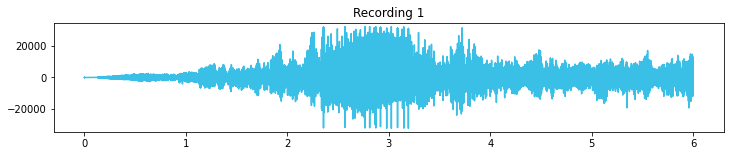

In [ ]:
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))
plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

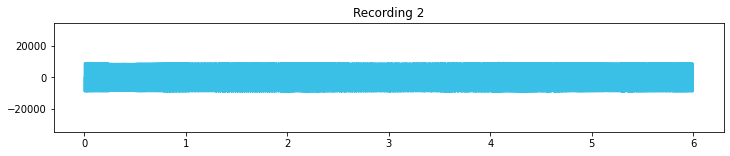

In [ ]:
fs = mix_2_wave.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_2))
plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

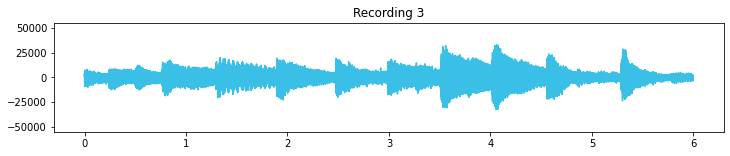

In [ ]:
fs = mix_3_wave.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_3))
plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-55000, 55000)
plt.show();

###Listen

In [ ]:
IPython.display.Audio(PATH+'signal_1.wav')

In [ ]:
IPython.display.Audio(PATH+'signal_2.wav')

In [ ]:
IPython.display.Audio(PATH+'signal_3.wav')

##**2)** Extract raw audio from the three wave files and merge them to create dataset X.

In [ ]:
X = list(zip(signal_1, signal_2, signal_3))
X[:10]

[(-23, -52, 2142),
 (-16, -624, 2328),
 (-28, -1178, 2010),
 (-11, -1740, 1989),
 (-25, -2282, 1671),
 (-15, -2827, 1605),
 (-14, -3351, 1344),
 (-19, -3870, 1262),
 (-10, -4370, 1066),
 (-17, -4856, 976)]

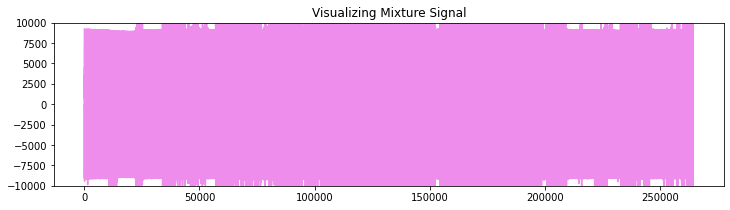

In [ ]:
plt.figure(figsize=(12,3))
plt.title('Visualizing Mixture Signal')
plt.plot(X, c="#ef8ded")
plt.ylim(-10000, 10000)
plt.show()

In [ ]:
X = pd.DataFrame(X, columns=['signal1', 'signal2', 'signal3'])
X

signal1  signal2  signal3
0           -23      -52     2142
1           -16     -624     2328
2           -28    -1178     2010
3           -11    -1740     1989
4           -25    -2282     1671
...         ...      ...      ...
264510    -8701    -5439      891
264511    -8845    -5886      986
264512    -8994    -6313     1296
264513    -9187    -6713     1332
264514    -9321    -7091     1754

[264515 rows x 3 columns]

In [ ]:
X.head()

signal1  signal2  signal3
0      -23      -52     2142
1      -16     -624     2328
2      -28    -1178     2010
3      -11    -1740     1989
4      -25    -2282     1671

##**3)** Implement ICA from scratch. For Convergence select either 1000 iterations, or when the dot product of w (demixing matrix) and its transpose is roughly equal to 1.

At a high level, ICA can be broken down into the following steps.

    1) Center x by subtracting the mean
    2) Whiten x
    3) Choose a random initial value for the de-mixing matrix w
    4) Calculate the new value for w
    5) Normalize w
    6) Check whether algorithm has converged and if it hasn’t, return to step 4
    7) Take the dot product of w and x to get the independent source signals

####1) Center x by subtracting the mean

In [ ]:
# So as to make x a zero-mean variable.
def centre(X):
    X = np.array(X)
    mean = X.mean(axis=1, keepdims=True)
    return X- mean

####2) Whiten x

In [ ]:
# The covariance matrix of the whitened signal will be equal to identity matrix.
def whiten(X):
    covarianceMatrix = np.cov(X)
    eigenvalue, eigenvec = np.linalg.eigh(covarianceMatrix)
    D = np.diag(eigenvalue)
    D_inv = np.sqrt(np.linalg.inv(D))
    A = np.dot(eigenvec.T, X)
    B = np.dot(D_inv, A)
    x_whiten = np.dot(eigenvec, B)
    return x_whiten

####3) Function that helps to calculate the new value of w

In [ ]:
def g(x):
    return np.tanh(x)

derivative

In [ ]:
def g_der(x):
    return 1 - g(x) * g(x)

####4) Calculate the new value for w and Normalize w

In [ ]:
def calculateNewW(w, X):
    W_new = (X * g(np.dot(w.T, X))).mean(axis=1) - g_der(np.dot(w.T, X)).mean() * w
    # Normalizing W.
    _factor = np.sqrt((W_new ** 2).sum())
    W_new = W_new/_factor
    return W_new

####5) Implemented ICA function that initializes w to some random set of values and iteratively updates w

In [ ]:
def ica(X, iterations):
    X = centre(X)
    X = whiten(X)
    comp = X.shape[0]
    W = np.zeros((comp, comp), dtype=X.dtype)
    for i in range(comp):    
        w = np.random.rand(comp)
        for j in range(iterations):
            W_new = calculateNewW(w, X)
            if i >= 1:
                W_new -= np.dot(np.dot(W_new, W[:i].T), W[:i])
            w = W_new
        W[i, :] = w
    S = np.dot(W, X)
    return S

####Calling the function implemented.

In [ ]:
X = X.T
S = ica(X, iterations=1000)

##**4)** Plot mixture, real source and predicted source from the output of ICA.

In [ ]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure(figsize=(20,5))
    _X = X.values
    for x in _X:
        plt.plot(x)
    plt.title("mixtures")
    plt.show()
    print(" ")
    fig = plt.figure(figsize=(20,5))
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")
    plt.show()
    print(" ")
    fig = plt.figure(figsize=(20,5))
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    fig.tight_layout()
    plt.show()
    print(" ")

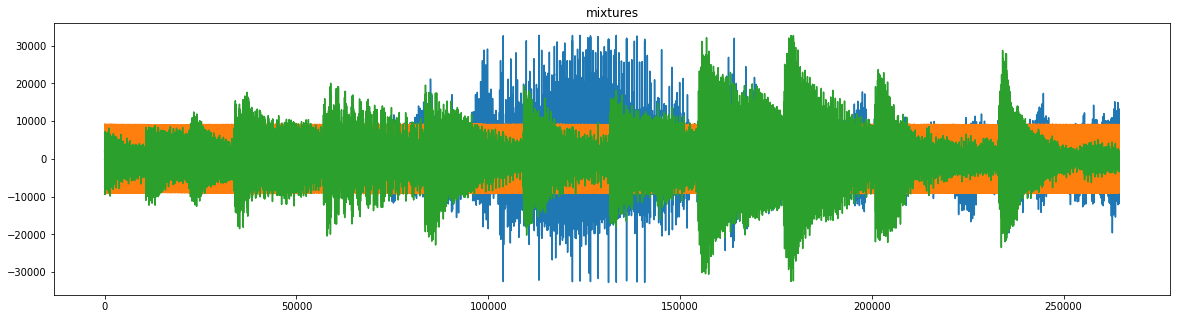

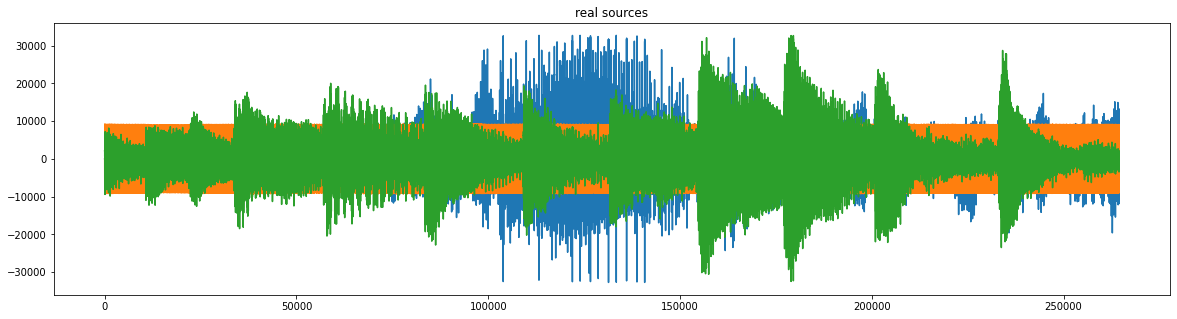

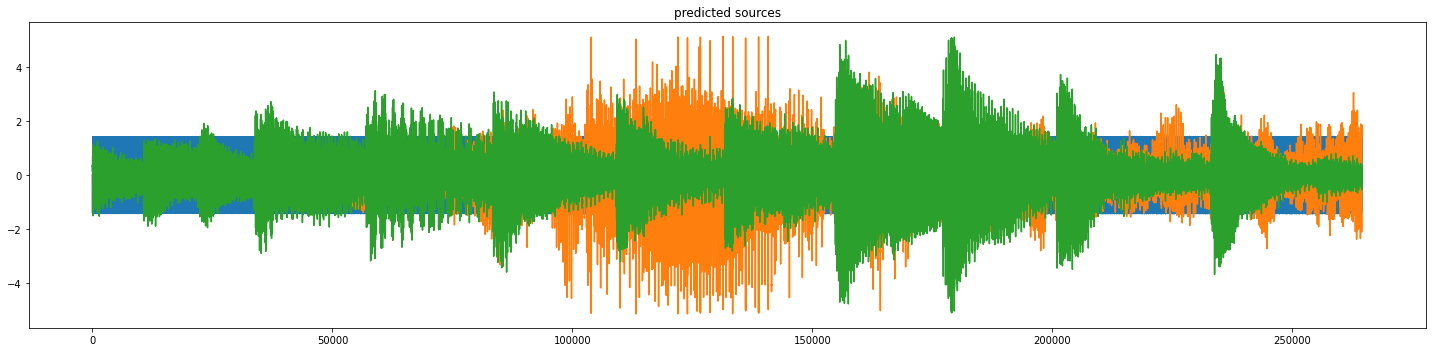

In [ ]:
plot_mixture_sources_predictions(X, [signal_1, signal_2, signal_3], S)

##**5)** Implement Fast ICA (import from sklearn.decomposition) selecting num_components = 3

In [ ]:
_X = X.T
ica = FastICA(n_components=3)
ica_result = ica.fit_transform(_X)

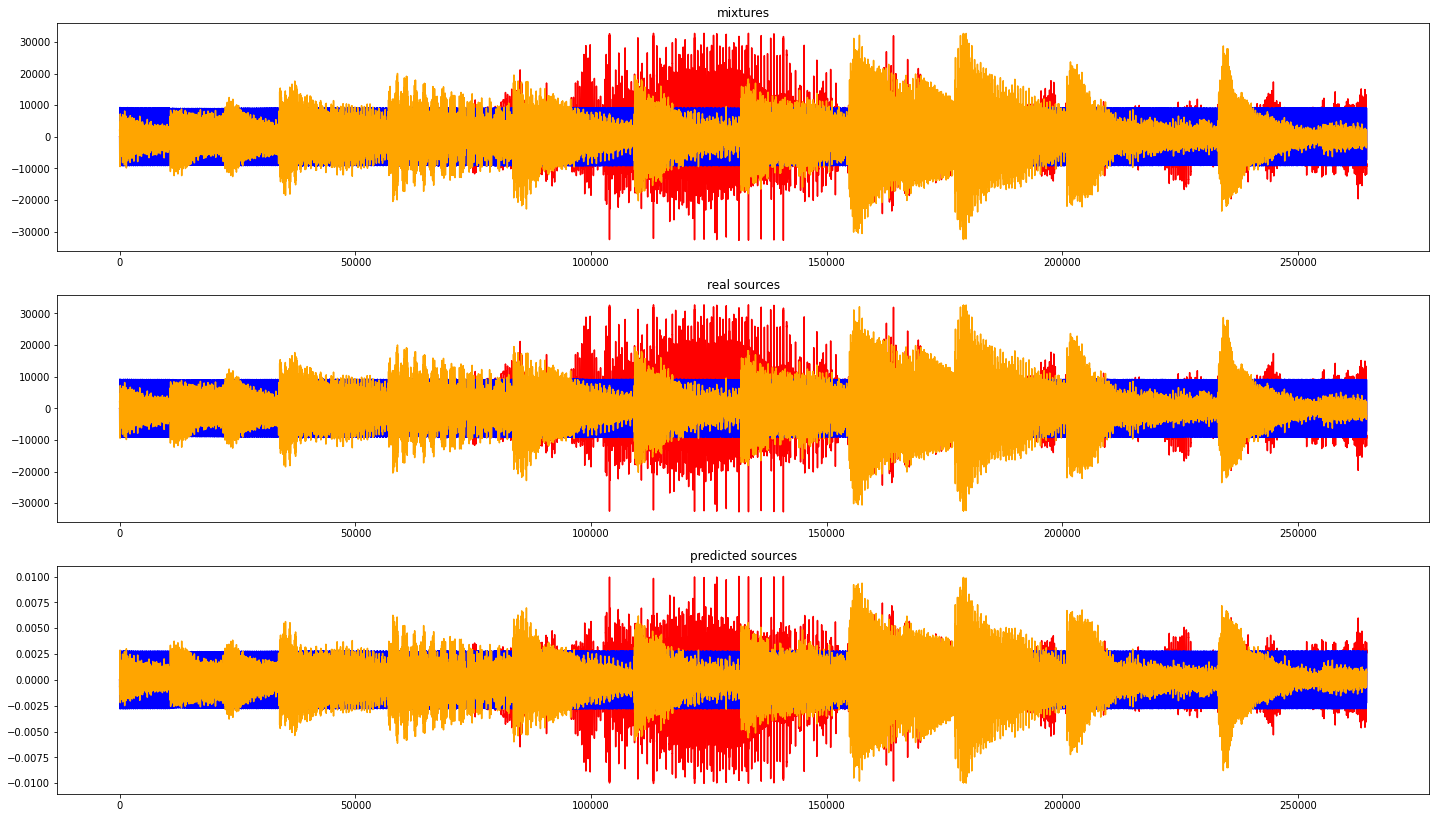

In [ ]:
original=[signal_1, signal_2, signal_3]
fig = plt.figure(figsize=(20,15))
_X = X.T
models = np.array([_X, original, ica_result])
names = ['mixtures', 'real sources', 'predicted sources']
colors = ['red', 'blue', 'orange']
for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    model=np.array(model)
    if(name=='real sources'):
      model=model.T
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
fig.tight_layout()        
plt.show()

In [ ]:
ica_result.shape

(264515, 3)

##**6)** Separate, Visualize and Listen the independent component obtained from task 5.

In [ ]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

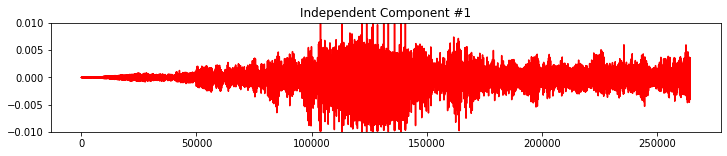

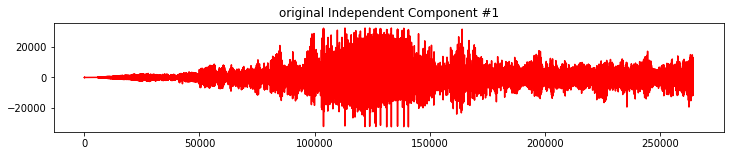

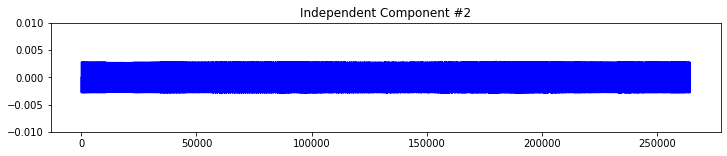

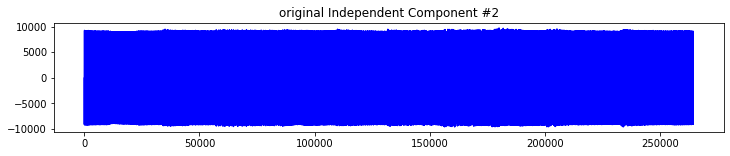

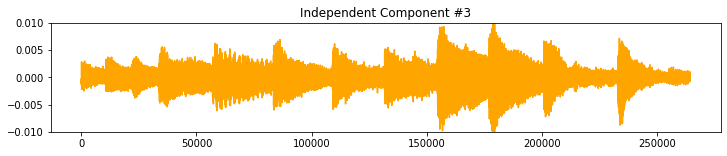

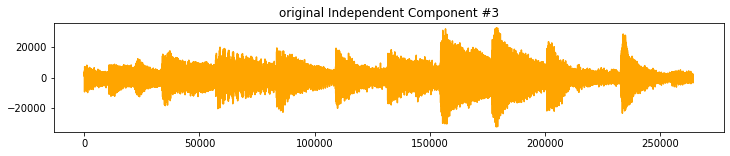

In [ ]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="r")
plt.ylim(-0.010, 0.010)
plt.show()
print(" ")
plt.figure(figsize=(12,2))
plt.title('original Independent Component #1')
plt.plot(signal_1, c="r")
plt.show()
print(" ")

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="b")
plt.ylim(-0.010, 0.010)
plt.show()
print(" ")
plt.figure(figsize=(12,2))
plt.title('original Independent Component #2')
plt.plot(signal_2, c="b")
plt.show()
print(" ")

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="orange")
plt.ylim(-0.010, 0.010)
plt.show()
print(" ")
plt.figure(figsize=(12,2))
plt.title('original Independent Component #3')
plt.plot(signal_3, c="orange")
plt.show()
print(" ")

In [ ]:
# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [ ]:
IPython.display.Audio("result_signal_1.wav")

In [ ]:
IPython.display.Audio("result_signal_2.wav")

In [ ]:
IPython.display.Audio("result_signal_3.wav")

##**7)** Comment on the results obtained from ICA and Fast ICA and report observations in the report.

In [ ]:
"""
The result obtained from ICA and Fast ICA are similar.
There are some instances where fluctuations are there in the predicted sources as compared to real sources.
Also, there are some instances where Fast ICA performed better than ICA as in ICA some sources were predicted as upside down.
Overall, predicted sources were similar to the real sources in both the cases.
"""

#**Question-2**

##**1)** Preprocess, clean and prepare the dataset based on the previous lab experience. Separate features and labels as X and Y respectively.

In [ ]:
TrainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-8/Q2/train.csv')
TrainData

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [ ]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
TrainData.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
print("The original number Of rows in dataset: ",len(TrainData))
TrainData =TrainData.dropna(axis=0)
print("No Of rows in Dataset after droping NAN values: ",len(TrainData))

The original number Of rows in dataset:  103904
No Of rows in Dataset after droping NAN values:  103594


In [ ]:
# Label Encoding the categorical data.
LabelEncode = LabelEncoder()
CategoricalData = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for i in CategoricalData:
  y = TrainData[i]
  y_transformed = LabelEncode.fit_transform(y)
  TrainData[i] = y_transformed

TrainData

Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
0                0   70172       1              0   13               1      2   
1                1    5047       1              1   25               0      0   
2                2  110028       0              0   26               0      0   
3                3   24026       0              0   25               0      0   
4                4  119299       1              0   61               0      0   
...            ...     ...     ...            ...  ...             ...    ...   
103899      103899   94171       0              1   23               0      1   
103900      103900   73097       1              0   49               0      0   
103901      103901   68825       1              1   30               0      0   
103902      103902   54173       0              1   22               0      1   
103903      103903   62567       1              0   27               0      0   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         ...   
103899                 3            2                           3   
103900              

In [ ]:
X = TrainData.drop(labels='satisfaction', axis=1)
Y = TrainData.iloc[:,24]
X

Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
0                0   70172       1              0   13               1      2   
1                1    5047       1              1   25               0      0   
2                2  110028       0              0   26               0      0   
3                3   24026       0              0   25               0      0   
4                4  119299       1              0   61               0      0   
...            ...     ...     ...            ...  ...             ...    ...   
103899      103899   94171       0              1   23               0      1   
103900      103900   73097       1              0   49               0      0   
103901      103901   68825       1              1   30               0      0   
103902      103902   54173       0              1   22               0      1   
103903      103903   62567       1              0   27               0      0   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  ...  Seat comfort  \
0                                       4  ...             5   
1                                       2  ...             1   
2                                       2  ...             5   
3                                       5  ...             2   
4                                       3  ...             5   
...                                   ...  ...           ...   
103899                                  1  ...             2   
103900                                  4  ...             5   
103901                                  1  ...             5   
103902                                  1  ...             1   
103903                                  3  ...             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5                 4     

In [ ]:
TestData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-8/Q2/test.csv')
TestData

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          50   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                       

In [ ]:
TestData.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
print("Original No Of Rows in Dataset: ",len(TestData))
TestData =TestData.dropna(axis=0)
print("No Of Rows in Dataset after droping NAN values: ",len(TestData))

Original No Of Rows in Dataset:  25976
No Of Rows in Dataset after droping NAN values:  25893


In [ ]:
LabelEncode = LabelEncoder()

CategoricalData=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for i in CategoricalData:
  y = TestData[i]
  encoded = LabelEncode.fit_transform(y)
  TestData[i] = encoded

TestData

Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
0               0  19556       0              0   52               0      1   
1               1  90035       0              0   36               0      0   
2               2  12360       1              1   20               0      1   
3               3  77959       1              0   44               0      0   
4               4  36875       0              0   49               0      1   
...           ...    ...     ...            ...  ...             ...    ...   
25971       25971  78463       1              1   34               0      0   
25972       25972  71167       1              0   23               0      0   
25973       25973  37675       0              0   17               1      1   
25974       25974  90086       1              0   14               0      0   
25975       25975  34799       0              0   42               1      1   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          50   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                           0   
25972                 5            4                           0   
25973              

##**2)** Create an object of SFS by embedding Decision Tree classifier object, providing 10 features, forward as True, floating as False and scoring = accuracy.

In [ ]:
# Decision Tree Classifier.
DTC = DecisionTreeClassifier(random_state=0)

# Object of SFS.
SFS = SequentialFeatureSelector(DTC, k_features = 10, forward = True, floating = False, scoring = 'accuracy')

SFS.fit(X, Y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=0),
                          k_features=10, scoring='accuracy')

##**3)** Train SFS and report accuracy for all 10 features. Also list the names of the 10 best features selected by SFS.

In [ ]:
SFS.subsets_

{1: {'avg_score': 0.7903353102550807,
  'cv_scores': array([0.78942034, 0.79279888, 0.79038564, 0.79260582, 0.78646588]),
  'feature_idx': (13,),
  'feature_names': ('Online boarding',)},
 2: {'avg_score': 0.8496148302952342,
  'cv_scores': array([0.84806217, 0.85201989, 0.84796564, 0.85168203, 0.84834443]),
  'feature_idx': (5, 13),
  'feature_names': ('Type of Travel', 'Online boarding')},
 3: {'avg_score': 0.8912485041976396,
  'cv_scores': array([0.89203147, 0.89299677, 0.8893769 , 0.89304503, 0.88879235]),
  'feature_idx': (5, 8, 13),
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding')},
 4: {'avg_score': 0.9217136206489922,
  'cv_scores': array([0.91939765, 0.92306579, 0.9190598 , 0.92451373, 0.92253113]),
  'feature_idx': (5, 8, 11, 13),
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Gate location',
   'Online boarding')},
 5: {'avg_score': 0.9291947405158524,
  'cv_scores': array([0.92721656, 0.93040205, 0.92745789, 0.9

In [ ]:
SFS.k_feature_idx_

(3, 5, 6, 8, 11, 13, 14, 15, 18, 20)

In [ ]:
SFS.k_feature_names_

('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

In [ ]:
SFS.k_score_

0.9506631738158859

##**4)** Using the forward and Floating parameter toggle between SFS(forward True, floating False), SBS (forward False, floating False), SFFS (forward True, floating True), SBFS (forward False, floating True), and choose cross validation = 4 for each configuration. Also report cv scores for each configuration.

In [ ]:
# Sequential Forward Selection
sfs = SequentialFeatureSelector(DTC, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4)
sfs = sfs.fit(X, Y)

print('\nSequential Forward Selection (k=10):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=10):
(3, 5, 6, 8, 11, 13, 14, 15, 18, 20)
CV Score:
0.9499198910655715


In [ ]:
# Sequential Backward Selection
sbs = SequentialFeatureSelector(DTC, 
          k_features=10, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4)
sbs = sbs.fit(X.values, Y)

print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

(3, 5, 6, 8, 13, 14, 15, 18, 20, 21)
CV Score:
0.9514257638213464


In [ ]:
# Sequential Forward Floating Selection
sffs = SequentialFeatureSelector(DTC, 
           k_features=10, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4)
sffs = sffs.fit(X.values, Y)

print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

(3, 5, 6, 8, 13, 14, 15, 18, 20, 21)
CV Score:
0.9514257638213464


In [ ]:
# Sequential Backward Floating Selection
sbfs = SequentialFeatureSelector(DTC, 
           k_features=10, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4)
sbfs = sbfs.fit(X.values, Y)

print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)

(3, 5, 6, 8, 13, 14, 15, 18, 20, 21)
CV Score:
0.9514257638213464


##**5)** Visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict for all four configurations.

In [ ]:
print('sfs')
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

sfs


feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 11, 13, 14, 18, 20)   
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9425846557782154, 0.939...    0.9413   
7   [0.9462913626008727, 0.9488011120120468, 0.948...  0.948269   
8   [0.9495347310706977, 0.9503455731881539, 0.950...  0.950615   
9   [0.9488397235414495, 0.9508089115409861, 0.951...   0.95076   
10  [0.9488397235414495, 0.9498050117765164, 0.949...   0.94992   

                                        feature_names  ci_bound   std_dev  \
1                                  (Online boarding,)  0.004065  0.002536   
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002925  0.001825   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001897  0.001183   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001315  0.000821   
9   (Customer Type, Type of Travel, Class, Infligh...   0.00193  0.001204   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001395   0.00087   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6   0.001053  
7   0.000683  
8   0.000474  
9   0.000695  
10  0.000502

In [ ]:
print('sbs')
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

sbs


feature_idx  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
21  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
20  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...   
18  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 1...   
17  (1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, ...   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...   
15  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...   
13    (3, 4, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)   
11           (3, 5, 6, 8, 13, 14, 15, 18, 19, 20, 21)   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)   

                                            cv_scores avg_score  \
24  [0.927564770840573, 0.9496891771883085, 0.9457...   0.94017   
23  [0.9436657786014904, 0.9480288814239932, 0.944...  0.946126   
22  [0.9445152322483493, 0.947333873894745, 0.9449...  0.946648   
21  [0.9447469014247655, 0.9486852774238388, 0.945...  0.947188   
20  [0.9449399590717789, 0.9489555581296575, 0.946...  0.947429   
19  [0.945287462836403, 0.9482605506004093, 0.9462...  0.947487   
18  [0.9471408162477316, 0.9468705355419128, 0.944...  0.946976   
17  [0.9468705355419128, 0.9464458087184834, 0.943...  0.946561   
16  [0.946368585659678, 0.9488397235414495, 0.9463...  0.947323   
15  [0.9462527510714699, 0.9476427661299665, 0.945...  0.946821   
14  [0.9442835630719333, 0.9467933124831075, 0.945...  0.945586   
13  [0.9445152322483493, 0.9451330167187922, 0.944...  0.945306   
12  [0.9469091470713155, 0.9473724854241476, 0.947...  0.947787   
11  [0.9492258388354763, 0.9501139040117379, 0.949...  0.949872   
10  [0.9509633576585969, 0.951310861423221, 0.9504...  0.951426   

                                        feature_names  ci_bound   std_dev  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.01356  0.008459   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.003332  0.002079   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.003355  0.002093   
21  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.003172  0.001979   
20  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...  0.003107  0.001938   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...  0.002973  0.001855   
18  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 1...  0.002544  0.001587   
17  (1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, ...  0.002925  0.001824   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...  0.001659  0.001035   
15  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...  0.001754  0.001094   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...  0.001568  0.000978   
13    (3, 4, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)  0.001713  0.001068   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)  0.001676  0.001045   
11           (3, 5, 6, 8, 13, 14, 15, 18, 19, 20, 21)   0.00106  0.000661   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)  0.001468  0.000915   

     std_err  
24  0.004884  
23    0.0012  
22  0.001208  
21  0.001142  
20  0.001119  
19  0.001071  
18  0.000916  
17  0.001053  
16  0.000597  
15  0.000632  
14  0.000565  
13  0.000617  
12  0.000603  
11  0.000382  
10  0.000529

In [ ]:
print('sffs')
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

sffs


feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 13, 14, 15, 18, 20)   
10  (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9425846557782154, 0.939...    0.9413   
7   [0.9462913626008727, 0.9488011120120468, 0.948...  0.948269   
8   [0.9495347310706977, 0.9503455731881539, 0.950...  0.950615   
9   [0.9503841847175567, 0.9510791922468049, 0.949...  0.950953   
10  [0.9509633576585969, 0.951310861423221, 0.9504...  0.951426   

                           feature_names  ci_bound   std_dev   std_err  
1                                  (13,)  0.004065  0.002536  0.001464  
2                                (5, 13)  0.002085    0.0013  0.000751  
3                             (5, 8, 13)  0.002214  0.001381  0.000797  
4                         (5, 8, 11, 13)  0.002346  0.001463  0.000845  
5                      (3, 5, 8, 11, 13)  0.001202   0.00075  0.000433  
6                  (3, 5, 8, 11, 13, 18)  0.002925  0.001825  0.001053  
7               (3, 5, 6, 8, 11, 13, 18)  0.001897  0.001183  0.000683  
8           (3, 5, 6, 8, 11, 13, 18, 20)  0.001315  0.000821  0.000474  
9       (3, 5, 6, 8, 13, 14, 15, 18, 20)  0.001436  0.000896  0.000517  
10  (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)  0.001468  0.000915  0.000529

In [ ]:
print('sbfs')
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

sbfs


feature_idx  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
21  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
20  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16...   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...   
18  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 1...   
17  (1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, ...   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...   
15  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...   
13    (3, 4, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)   
11           (3, 5, 6, 8, 13, 14, 15, 18, 19, 20, 21)   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)   

                                            cv_scores avg_score  \
24  [0.927564770840573, 0.9496891771883085, 0.9457...   0.94017   
23  [0.9436657786014904, 0.9480288814239932, 0.944...  0.946126   
22  [0.9445152322483493, 0.947333873894745, 0.9449...  0.946648   
21  [0.9447469014247655, 0.9486852774238388, 0.945...  0.947188   
20  [0.9458280242480405, 0.9491100042472682, 0.946...  0.947622   
19  [0.945287462836403, 0.9482605506004093, 0.9462...  0.947487   
18  [0.9471408162477316, 0.9468705355419128, 0.944...  0.946976   
17  [0.9468705355419128, 0.9464458087184834, 0.943...  0.946561   
16  [0.946368585659678, 0.9488397235414495, 0.9463...  0.947323   
15  [0.9462527510714699, 0.9476427661299665, 0.945...  0.946821   
14  [0.9442835630719333, 0.9467933124831075, 0.945...  0.945586   
13  [0.9445152322483493, 0.9451330167187922, 0.944...  0.945306   
12  [0.9469091470713155, 0.9473724854241476, 0.947...  0.947787   
11  [0.9492258388354763, 0.9501139040117379, 0.949...  0.949872   
10  [0.9509633576585969, 0.951310861423221, 0.9504...  0.951426   

                                        feature_names  ci_bound   std_dev  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.01356  0.008459   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.003332  0.002079   
22  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.003355  0.002093   
21  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.003172  0.001979   
20  (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16...  0.002642  0.001648   
19  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...  0.002973  0.001855   
18  (1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 1...  0.002544  0.001587   
17  (1, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, ...  0.002925  0.001824   
16  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...  0.001659  0.001035   
15  (1, 3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19,...  0.001754  0.001094   
14  (3, 4, 5, 6, 8, 11, 13, 14, 15, 17, 18, 19, 20...  0.001568  0.000978   
13    (3, 4, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)  0.001713  0.001068   
12       (3, 5, 6, 8, 11, 13, 14, 15, 18, 19, 20, 21)  0.001676  0.001045   
11           (3, 5, 6, 8, 13, 14, 15, 18, 19, 20, 21)   0.00106  0.000661   
10               (3, 5, 6, 8, 13, 14, 15, 18, 20, 21)  0.001468  0.000915   

     std_err  
24  0.004884  
23    0.0012  
22  0.001208  
21  0.001142  
20  0.000952  
19  0.001071  
18  0.000916  
17  0.001053  
16  0.000597  
15  0.000632  
14  0.000565  
13  0.000617  
12  0.000603  
11  0.000382  
10  0.000529

##**6)** Finally plot the results for each configuration (from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs).

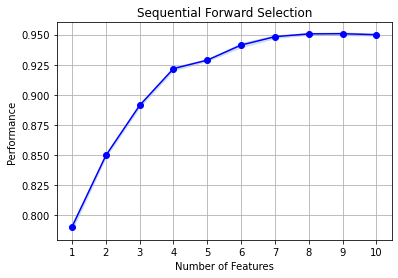

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict())
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

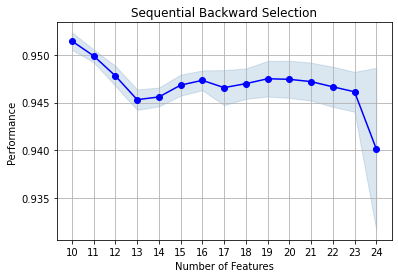

In [ ]:
fig2 = plot_sfs(sbs.get_metric_dict())
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

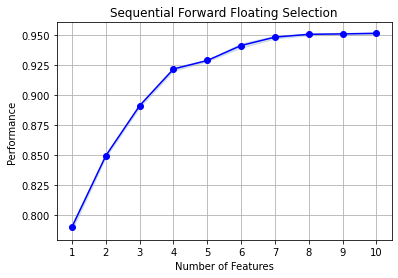

In [ ]:
fig3 = plot_sfs(sffs.get_metric_dict())
plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()

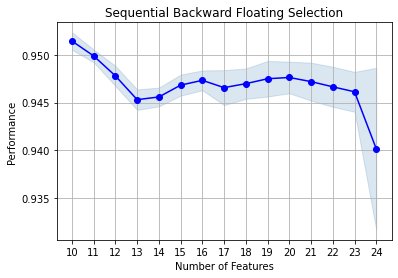

In [ ]:
fig4 = plot_sfs(sbfs.get_metric_dict())
plt.title('Sequential Backward Floating Selection')
plt.grid()
plt.show()

##**7)** For task 2 vary the features by increasing or decreasing, observe and report the results.

best combination (ACC: 0.952): (3, 5, 6, 8, 11, 13, 14, 18, 20)

all subsets:
 {1: {'feature_idx': (13,), 'cv_scores': array([0.78942034, 0.79279888, 0.79038564, 0.79260582, 0.78646588]), 'avg_score': 0.7903353102550807, 'feature_names': ('13',)}, 2: {'feature_idx': (5, 13), 'cv_scores': array([0.84806217, 0.85201989, 0.84796564, 0.85168203, 0.84834443]), 'avg_score': 0.8496148302952342, 'feature_names': ('5', '13')}, 3: {'feature_idx': (5, 8, 13), 'cv_scores': array([0.89203147, 0.89299677, 0.8893769 , 0.89304503, 0.88879235]), 'avg_score': 0.8912485041976396, 'feature_names': ('5', '8', '13')}, 4: {'feature_idx': (5, 8, 11, 13), 'cv_scores': array([0.91939765, 0.92306579, 0.9190598 , 0.92451373, 0.92253113]), 'avg_score': 0.9217136206489922, 'feature_names': ('5', '8', '11', '13')}, 5: {'feature_idx': (5, 8, 11, 13, 18), 'cv_scores': array([0.92721656, 0.93040205, 0.92745789, 0.93175346, 0.92914374]), 'avg_score': 0.9291947405158524, 'feature_names': ('5', '8', '11', '13', '18')}, 6:

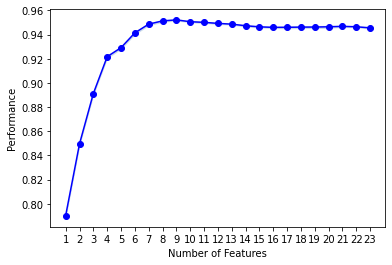

In [ ]:
SFS = SequentialFeatureSelector(estimator=DTC, 
           k_features=(1, 23),
           forward=True, 
           floating=False, 
           scoring='accuracy')

pipe = make_pipeline(StandardScaler(), SFS)
pipe.fit(X, Y)
print('best combination (ACC: %.3f): %s\n' % (SFS.k_score_, SFS.k_feature_idx_))
print('all subsets:\n', SFS.subsets_)
plot_sfs(SFS.get_metric_dict(), kind='std_err');